# Nobel Prize Dataset Analysis

## Introduction

The Nobel Prize stands as one of the most prestigious recognitions awarded to individuals who have made outstanding contributions to humanity in the fields of Physics, Chemistry, Medicine, Literature, Peace, and Economic Sciences. This dataset analysis delves into the extensive Nobel Prize dataset, spanning from 1901 to 2016, with the aim of extracting insights into laureates' demographics, achievements, and historical trends.

### Dataset Overview

The dataset encompasses a wealth of information, including laureates' birthplaces, genders, birthdates, Nobel Prize categories, and the specific achievements that led to their recognition. By leveraging data manipulation and visualization techniques, we seek to uncover patterns, trends, and noteworthy observations within this rich repository.

## Objectives

Our primary objectives for this analysis include:

1. **Demographic Insights:** Explore the demographic distribution of Nobel Prize laureates, focusing on gender representation, birthplaces, and nationalities.
  
2. **Temporal Trends:** Investigate how the distribution of Nobel Prizes has evolved over time, examining changes in laureates' demographics and achievements across different decades.

3. **Category-specific Analysis:** Examine laureates' achievements in distinct categories (Physics, Chemistry, Medicine, Literature, Peace, and Economic Sciences) to identify patterns and disparities within each field.

4. **Individual Recognition:** Highlight notable laureates, including the first woman to receive a Nobel Prize and individuals with multiple Nobel Prize accolades.

5. **Age Analysis:** Explore the age distribution of Nobel Prize winners over the years to gain insights into the recognition of achievements at different stages of life.

## Methodology

To achieve these objectives, we will leverage data manipulation libraries such as Pandas for cleaning and organizing the dataset. Visualization will be facilitated by Seaborn and Matplotlib to create informative plots and charts. Through a combination of statistical analysis and visual representation, we aim to provide a comprehensive understanding of the Nobel Prize dataset.


In [1]:
# Importing necessary libraries
import pandas as pd  # Pandas for data manipulation
import seaborn as sns  # Seaborn for data visualization
import numpy as np  # NumPy for numerical operations

# Reading the Nobel Prize dataset from a CSV file
nobel = pd.read_csv("nobel.csv")

# Displaying the first six rows of the dataset to get an overview
nobel.head(6)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


In [2]:
# Displaying the total number of Nobel Prizes handed out between 1901 and 2016
total_prizes = len(nobel["prize"])
display(total_prizes)

# Displaying the number of prizes won by male and female recipients
gender_counts = nobel["sex"].value_counts()
display(gender_counts)

# Displaying the number of prizes won by the top 10 nationalities
top_nationalities = nobel["birth_country"].value_counts().head(10)
display(top_nationalities)


911

Male      836
Female     49
Name: sex, dtype: int64

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64

In [3]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel["birth_country"] == "United States of America"
nobel['decade'] = (np.floor(nobel["year"]/10)*10).astype(int)
prop_usa_winners = nobel.groupby("decade", as_index=False)["usa_born_winner"].mean()

# Displaying the proportions of USA born winners per decade
display(prop_usa_winners)


,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


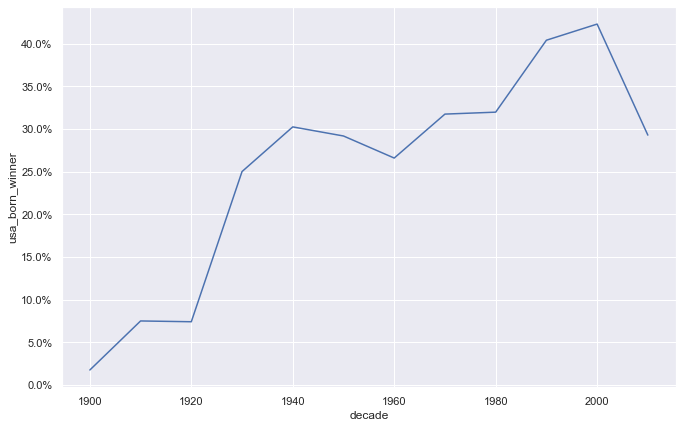

In [4]:
# Setting the plotting theme using Seaborn
sns.set()
# Setting the size of all plots
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting the proportion of USA born winners over decades
ax = sns.lineplot(data=prop_usa_winners, x="decade", y="usa_born_winner")

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))


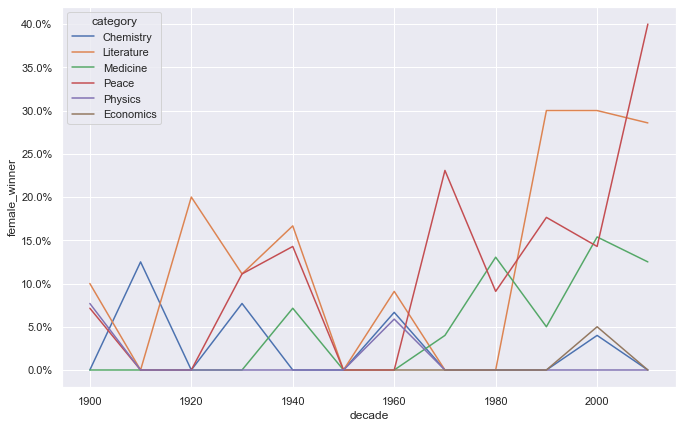

In [5]:
# Calculating the proportion of female laureates per decade and category
nobel['female_winner'] = nobel["sex"] == "Female"
prop_female_winners = nobel.groupby(["decade", "category"], as_index=False)["female_winner"].mean()

# Plotting the proportion of female laureates with % winners on the y-axis
# Setting the plotting theme using Seaborn
sns.set()
# Setting the size of all plots
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting the proportion of female laureates over decades and categories
ax = sns.lineplot(data=prop_female_winners, x="decade", y="female_winner", hue="category")

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))


In [8]:
# Finding the first woman to win a Nobel Prize
first_female_winner = nobel[nobel["sex"] == "Female"].nsmallest(1, "decade", keep="first")
first_female_winner


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


In [11]:
# Selecting the laureates that have received 2 or more prizes
prolific_laureates = nobel.groupby("full_name").filter(lambda x: len(x) >= 2)
prolific_laureates


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False


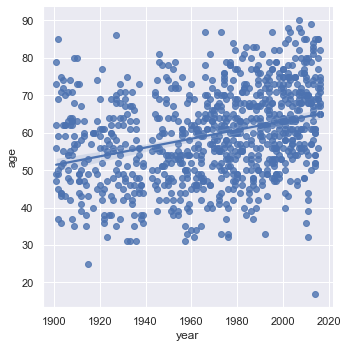

In [12]:
# Converting the 'birth_date' column from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])

# Calculating the age of Nobel Prize winners by subtracting birth year from prize year
nobel['age'] = nobel["year"] - nobel["birth_date"].dt.year

# Plotting the age of Nobel Prize winners over the years using a scatter plot
sns.lmplot(data=nobel, x="year", y="age")


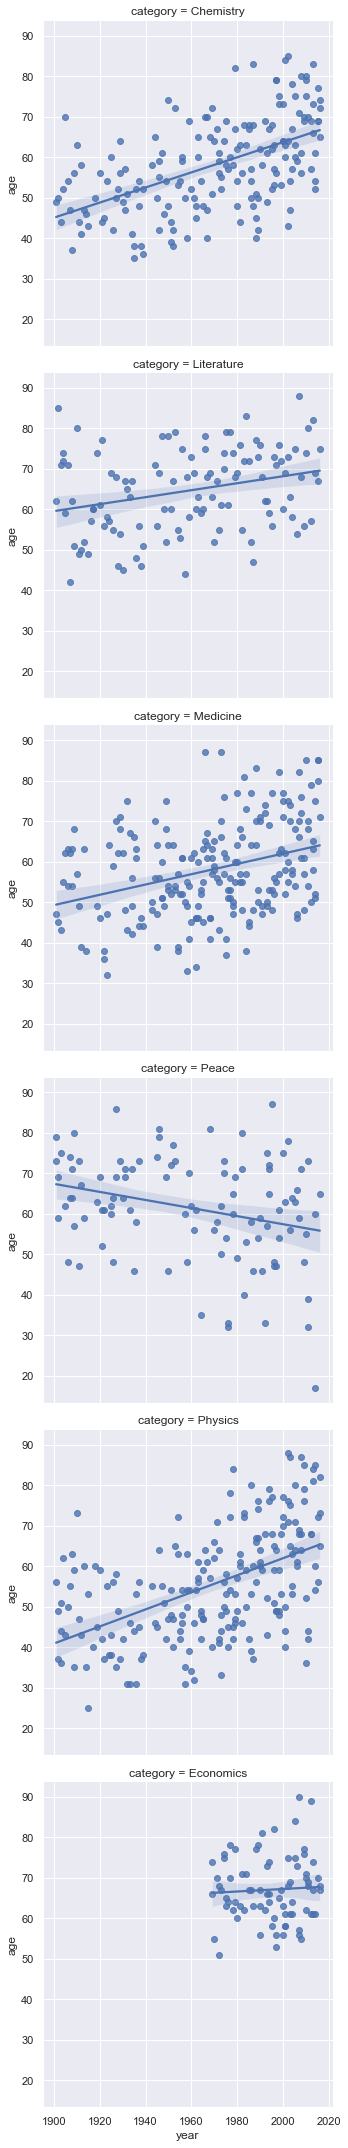

In [13]:
# Plotting the age of Nobel Prize winners over the years, with separate plots for each type of Nobel Prize
sns.lmplot(data=nobel, x="year", y="age", row="category")


In [15]:
# Finding the oldest winner of a Nobel Prize as of 2016
oldest_winner = nobel.nlargest(1, 'age')
display(oldest_winner)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0


In [16]:
# Finding the youngest winner of a Nobel Prize as of 2016
youngest_winner = nobel.nsmallest(1, 'age')
display(youngest_winner)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0


# Conclusion

In this Jupyter notebook, we conducted a thorough analysis of the Nobel Prize dataset, exploring various dimensions of laureates and their achievements. Here are the key findings from our analysis:

## 1. Number of Nobel Prizes
We started by examining the overall distribution of Nobel Prizes awarded between 1901 and 2016, revealing a total of **911** prizes.

## 2. Gender Distribution
Investigating the gender distribution of Nobel Prize winners, we found **836 male** and **49 female** laureates. This analysis highlighted historical gender disparities in Nobel Prize recognition.

## 3. Top Nationalities
We identified the top 10 nationalities with the most Nobel Prize winners, offering insights into the geographical distribution of laureates.

## 4. Proportion of USA-Born Winners
Calculating and visualizing the proportion of USA-born winners per decade, we observed the dominance of the United States in Nobel Prize achievements over the years.

## 5. Proportion of Female Laureates by Decade and Category
Further exploring the gender distribution, we visualized the proportion of female laureates per decade and category. The line plot revealed trends and variations in female representation across different fields over time.

## 6. Individual Achievements
We pinpointed notable laureates, including the first woman to win a Nobel Prize, ***Marie Curie née Sklodowska***, and identified prolific laureates who received two or more prizes.

## 7. Age Analysis
By converting birth dates to datetime and calculating the age of Nobel Prize winners, we visualized the age distribution over the years, uncovering insights about the aging of laureates.

## 8. Youngest and Oldest Winners
Finally, we identified the youngest winner, ***Malala Yousafza at the age of 17***, and oldest winner, ***Leonid Hurwicz at the age of 90***, of Nobel Prizes as of 2016.


